In [2]:
import pandas as pd
import numpy as np
trdf = pd.read_csv('train_aWnotuB.csv')
trainMat = trdf.as_matrix()
tedf = pd.read_csv('test_BdBKkAj.csv')
testMat = tedf.as_matrix()
train = []
target = []
print trainMat
for i in trainMat:
    s = i[3]
    year = s / (10**7)
    s = s % (10**7)
    month = s / (10**5)
    s = s % (10**5)
    date = s / (10**3)
    s = s % (10**3)
    time = s / (10)
    s = s % (10)
    junction = s
    train.append([year, month, date, time, junction])
    target.append(i[2])
X = np.array(train)
y = np.array(target)



[['2015-11-01 00:00:00' 1 15 20151101001]
 ['2015-11-01 01:00:00' 1 13 20151101011]
 ['2015-11-01 02:00:00' 1 10 20151101021]
 ..., 
 ['2017-06-30 21:00:00' 4 16 20170630214]
 ['2017-06-30 22:00:00' 4 22 20170630224]
 ['2017-06-30 23:00:00' 4 12 20170630234]]


In [9]:
jun1 = []
jun2 = []
jun3 = []
jun4 = []
jun5 = []
jun = [jun1, jun2, jun3, jun4, jun5]
for i in xrange(0,len(train), 24):
    ct = 0
    for j in xrange(24):
        ct += target[i+j]
    #print train[i][4]
    jun[train[i][4]-1].append(ct)
jun[3] = [0]*(len(jun[0])- len(jun[3])) + jun[3]
print len(jun[0]), len(jun[1]), len(jun[2]), len(jun[3])

k = 7
week = [[] for i in xrange(k)]
for i in xrange(len(jun[1])):
    week[i%k].append(jun[1][i])
for i in xrange(k):
    print np.mean(week[i])
    

hour = [[] for i in xrange(24)]
for i in xrange(len(jun[0])*24+len(jun[1])*24, len(jun[0])*24+len(jun[1])*24+len(jun[2])*24):
    hour[i%24].append(target[i])

for i in xrange(24):
    print np.mean(hour[i])

temp = [-i for i in jun[3]]
jun[4] = np.add(jun[2], temp)

608 608 608 608
243.459770115
365.494252874
397.367816092
394.0
384.632183908
358.620689655
249.906976744
14.1743421053
9.85690789474
8.05592105263
6.77631578947
5.97861842105
5.68585526316
6.23684210526
7.55098684211
9.05756578947
11.4292763158
15.0049342105
17.1875
17.7072368421
16.0493421053
17.5723684211
17.3717105263
16.8815789474
16.9013157895
17.9292763158
19.1299342105
20.2006578947
18.7220394737
17.3947368421
15.8009868421


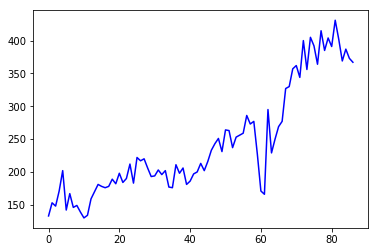

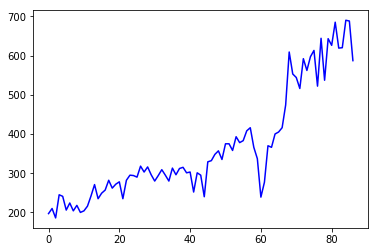

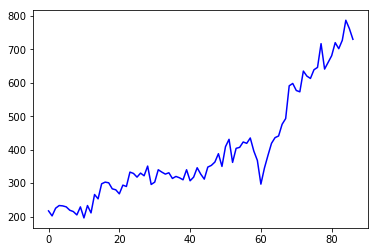

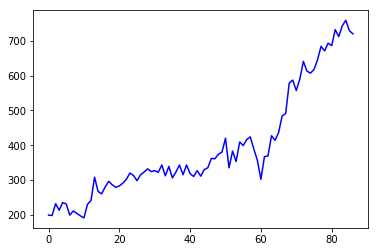

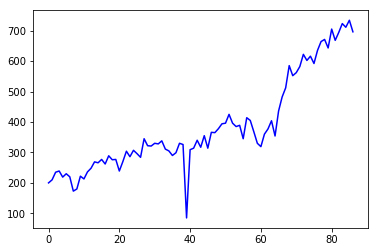

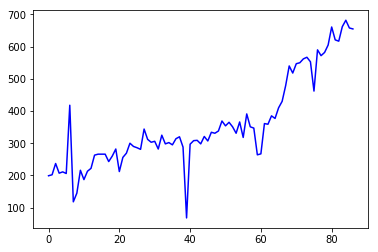

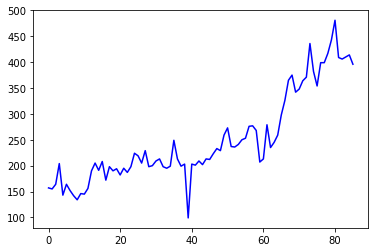

In [10]:
import matplotlib.pyplot as plt
for i in xrange(len(week)):
    plt.plot(week[i], 'blue')
    plt.savefig('f'+str(i)+'.png')
    plt.show()

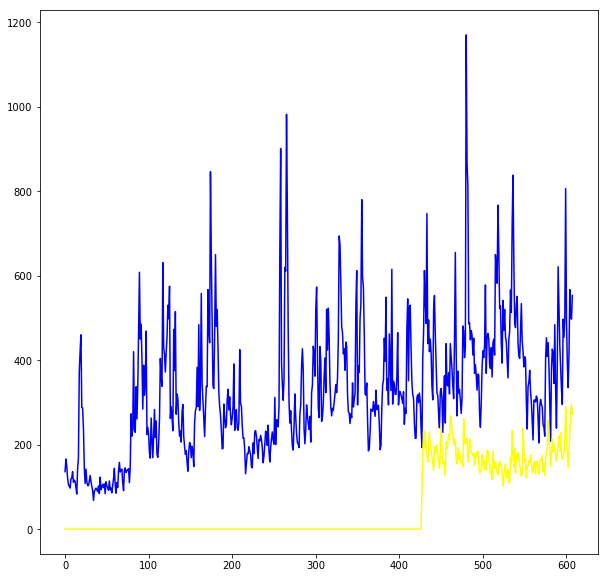

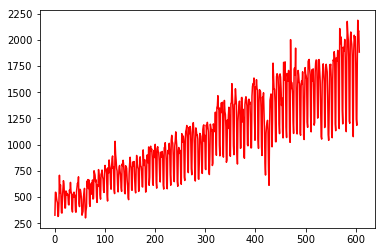

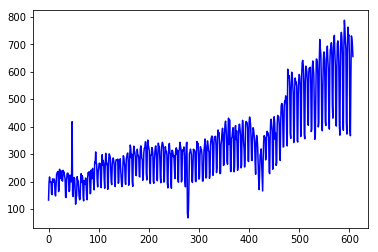

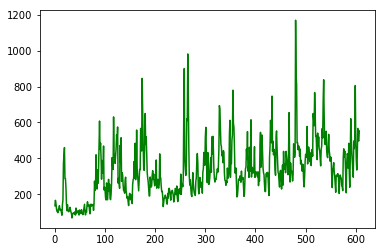

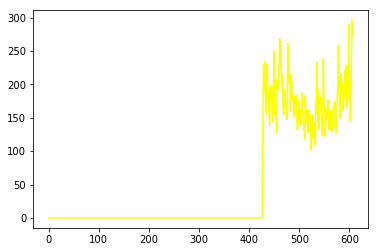

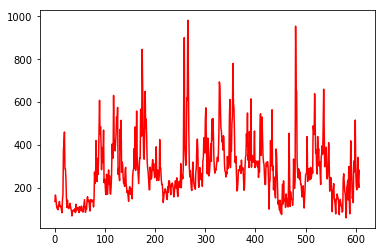

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

#plt.plot(jun[0], 'red')
plt.plot(jun[2], 'blue')
#plt.plot(jun[2], 'green')
plt.plot(jun[3], 'yellow')
plt.show()
plt.plot(jun[0], 'red')
plt.show()
plt.plot(jun[1], 'blue')
plt.show()
plt.plot(jun[2], 'green')
plt.show()
plt.plot(jun[3], 'yellow')
plt.show()
plt.plot(jun[4], 'red')
plt.show()

In [ ]:
print 1

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=7)
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(criterion = 'entropy', min_samples_split = 150, min_samples_leaf = 10, max_depth = 12, class_weight = 'balanced', n_estimators = 100)
from sklearn.linear_model import LinearRegression
clf2 = LinearRegression()
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt

'''
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2 = clf1.fit(X_train, y_train)
    pred2 = clf1.predict(X_test)
    print pred1[:10], y_test[:10]
    rms = sqrt(mean_squared_error(y_test, pred2))
    print rms'''

clf2 = clf2.fit(X, y)
pred = clf2.predict(X)



    